In [1]:
import numpy as np 
import pandas as pd
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\stefa\\Desktop\\HKUST\\Hydrogen\\Submission preparation\\input parameters\\electricity\\electricity-industry-ret.csv")
df = df.drop(columns=['Category', 'Unnamed: 1', 'Unnamed: 2', 'Iceland'])
df.head()

,EU_AVG,EU - Max,EU - Min,Austria,Belgium,Bulgaria,Cyprus,Czech_Republic,Germany,Denmark,...,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,UK,Switzerland,Norway
0,111.72,166.79,54.44,NaN,93.87,55.11,132.20,NaN,106.11,99.54,...,100.13,86.50,NaN,87.0,68.74,87.17,120.33,78.19,93.07,66.43
1,112.80,166.79,54.44,NaN,101.14,55.11,135.12,NaN,106.40,99.54,...,NaN,94.02,120.77,87.0,NaN,84.83,120.33,NaN,NaN,NaN
2,106.86,166.79,53.23,102.92,104.79,55.11,135.25,102.77,106.40,99.54,...,100.32,94.02,120.77,87.0,68.34,84.83,120.33,86.48,NaN,58.04
3,107.78,172.30,53.23,102.92,106.68,55.11,134.85,102.77,106.70,100.01,...,100.35,92.66,120.77,87.0,68.39,84.83,120.33,88.28,NaN,55.38
4,107.92,172.30,53.23,102.98,107.47,55.11,135.62,102.77,106.84,100.01,...,100.41,94.39,120.77,87.0,68.07,84.83,120.33,88.28,NaN,53.81


In [3]:
df['Date'] = pd.date_range(start='1/2008', end='1/2020', freq='M')
df = df.fillna(df.mean())
df.set_index('Date', inplace=True)

C:\Users\stefa\AppData\Local\Temp\ipykernel_7248\1848028851.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


In [4]:
df.tail()

,EU_AVG,EU - Max,EU - Min,Austria,Belgium,Bulgaria,Cyprus,Czech_Republic,Germany,Denmark,...,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,UK,Switzerland,Norway
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,113.53,182.50,58.29,94.22,96.96,81.19,158.15,73.76,126.37,64.59,...,84.34,75.39,144.25,92.78,58.29,78.98,122.57,133.42,109.763333,54.27
2019-09-30,113.39,181.85,57.75,94.22,96.84,81.19,163.47,73.76,126.48,63.69,...,84.46,75.39,144.25,92.78,57.75,79.75,122.57,133.42,109.763333,52.34
2019-10-31,114.11,184.30,58.57,94.22,97.73,81.19,168.23,73.76,126.48,67.01,...,84.36,75.39,144.43,92.78,58.57,80.12,122.57,130.60,109.763333,55.45
2019-11-30,114.22,184.78,60.26,94.22,97.93,81.19,172.18,74.83,126.60,67.63,...,84.51,75.39,144.43,92.78,60.26,80.01,122.57,130.60,109.763333,58.24
2019-12-31,113.87,185.11,58.83,94.22,97.12,81.19,169.64,75.39,126.84,67.90,...,84.24,75.39,144.59,93.41,58.83,81.04,122.57,130.60,109.763333,56.41


In [5]:
country = 'EU_AVG'

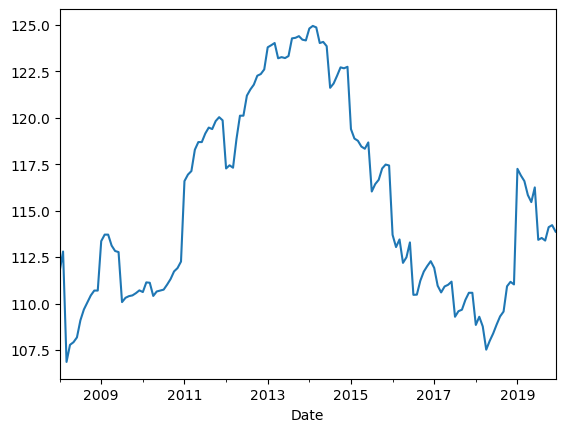

In [6]:
df[country].plot()
plt.show()

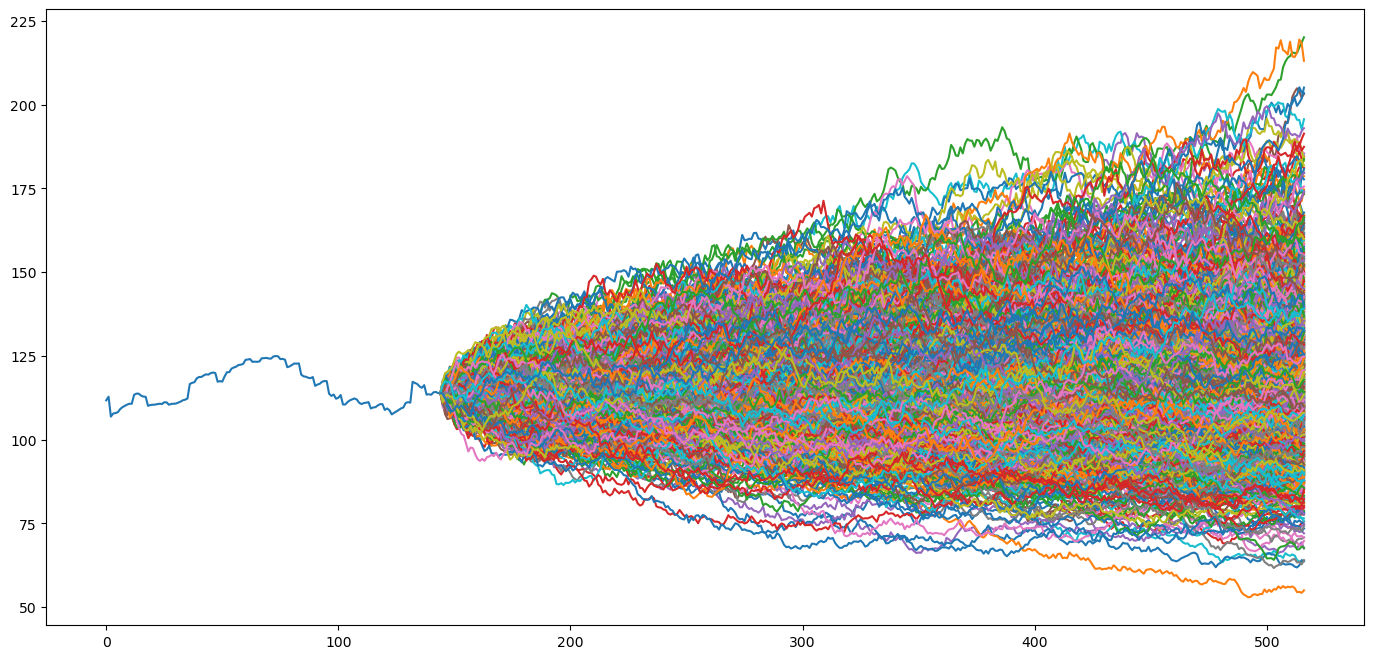

Mean Results: 116.508144856895
[[113.87       113.87       113.87       ... 113.87       113.87
  113.87      ]
 [113.65840685 112.90189401 115.71998968 ... 111.18843445 116.32592525
  113.65840685]
 [112.41245255 113.20011203 116.87727496 ... 112.8175075  117.41693681
  112.41245255]
 ...
 [133.27851807 134.10394326 133.78752651 ... 106.81829647 136.82243287
  133.27851807]
 [133.25743353 134.38205097 134.00400487 ... 107.87537093 138.96555799
  133.25743353]
 [132.45814511 132.57681301 135.98506434 ... 108.04709218 139.06153607
  132.45814511]]


In [10]:
# Calculate number of months from the end of 2019 until the end of 2050
start_date = pd.Timestamp('2019-12-31')
end_date = pd.Timestamp('2050-12-31')
t_intervals = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Other parameters
iterations = 1000  # Run 10 different forecasts

# Calculate logarithmic returns
log_returns = np.log(1 + df[country].pct_change())

# Parameters for GBM
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

# Simulate the annual changes
annual_change = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

# Create a variable (SO) equal to the last closing price
last_price = df[country].iloc[-1]

# Initialize price array and set initial value
price_value = np.zeros_like(annual_change)
price_value[0] = last_price

# Generate simulated paths
for t in range(1, t_intervals):
    price_value[t] = price_value[t - 1] * annual_change[t]

# Combine with historical data
price_value = pd.DataFrame(price_value)
price_value[country] = price_value[0]

frames = [df[country], price_value]
monte_carlo_forecast = pd.concat(frames)

# Plotting
monte_carlo = monte_carlo_forecast.iloc[:, :].values
plt.figure(figsize=(17, 8))
plt.plot(monte_carlo)
plt.show()

# Analyzing results
results_monte_carlo = monte_carlo[-t_intervals:]  # Select only the forecasted points
mean_results = results_monte_carlo.mean()

print(f"Mean Results: {mean_results}")
print(results_monte_carlo)

NameError: name 'mdates' is not defined

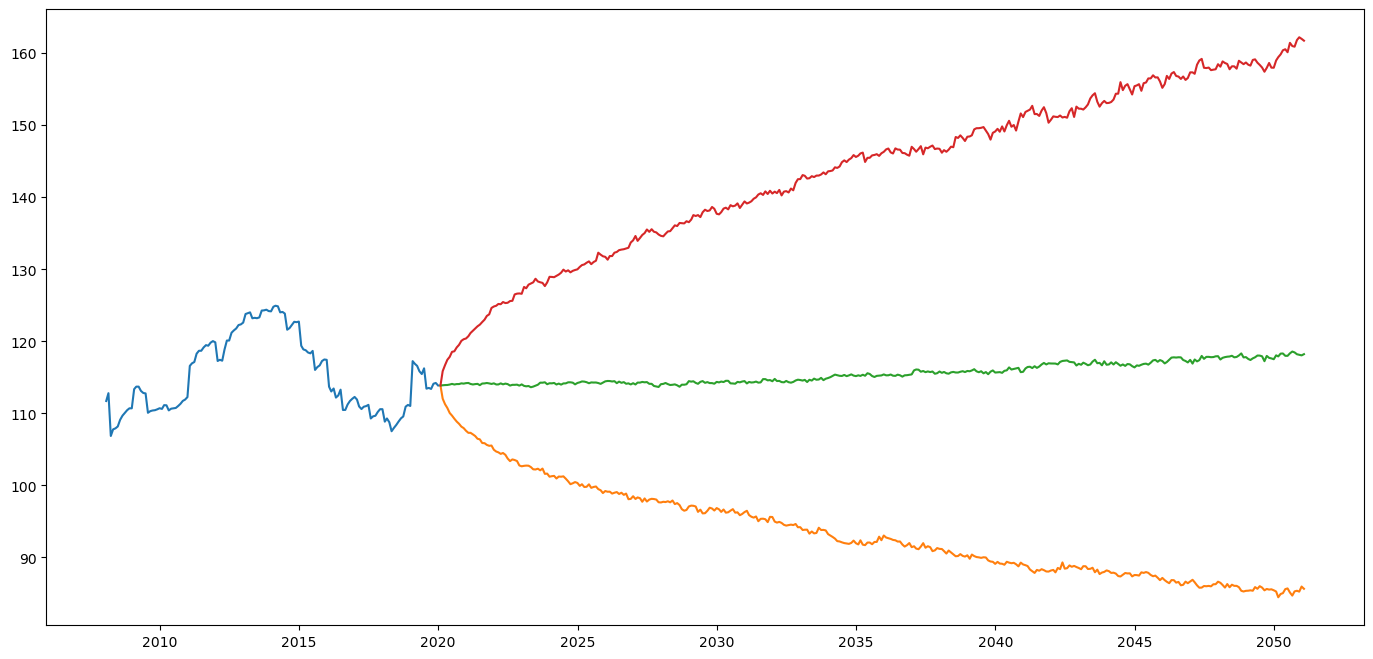

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate percentiles
p_5 = np.percentile(price_value, 5, axis=1)  # 5th percentile
p_50 = np.percentile(price_value, 50, axis=1)  # 50th percentile
p_95 = np.percentile(price_value, 95, axis=1)  # 95th percentile

# Create a date range for the forecast period
forecast_dates = pd.date_range(start='2020-01-01', periods=t_intervals, freq='M')

# Plotting
plt.figure(figsize=(17, 8))

# Plot historical data
plt.plot(df.index, df[country], label='Historical')

# Plot percentiles
plt.plot(forecast_dates, p_5, label='5th percentile')
plt.plot(forecast_dates, p_50, label='50th percentile')
plt.plot(forecast_dates, p_95, label='95th percentile')

# Set the date format
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)

# Set the locator
locator = mdates.YearLocator()  # every year
plt.gca().xaxis.set_major_locator(locator)

# Set x and y labels
plt.ylabel('EUR/MWh')

# Rotate x-axis ticks
plt.xticks(rotation=90)

plt.legend()
plt.show()

In [74]:
# Find nearest date to the target date
def nearest_date(array, target_date):
    target_date = np.datetime64(target_date)
    idx = np.argmin(np.abs(array - target_date))
    return idx

# Get the indices corresponding to the date range
start_idx = nearest_date(forecast_dates, '2024-01-31')  # Adjusted to end of January
end_idx = nearest_date(forecast_dates, '2050-12-31')  # End of December

# Calculate the average for each percentile over the date range
avg_5 = np.mean(p_5[start_idx:end_idx+1])
avg_50 = np.mean(p_50[start_idx:end_idx+1])
avg_95 = np.mean(p_95[start_idx:end_idx+1])

print(f"Average electricity price from 2024 to 2050 for the 5th percentile: {avg_5} EUR/MWh")
print(f"Average electricity price from 2024 to 2050 for the 50th percentile: {avg_50} EUR/MWh")
print(f"Average electricity price from 2024 to 2050 for the 95th percentile: {avg_95} EUR/MWh")

Average electricity price from 2024 to 2050 for the 5th percentile: 90.30399582384135 EUR/MWh
Average electricity price from 2024 to 2050 for the 50th percentile: 115.76642486840412 EUR/MWh
Average electricity price from 2024 to 2050 for the 95th percentile: 150.21587925730714 EUR/MWh


---

In [75]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Calculate number of months from the end of 2019 until the end of 2050
start_date = pd.Timestamp('2019-12-31')
end_date = pd.Timestamp('2050-12-31')
t_intervals = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Other parameters
iterations = 1000  # Run 10 different forecasts

# Function to find nearest date to the target date
def nearest_date(array, target_date):
    target_date = np.datetime64(target_date)
    idx = np.argmin(np.abs(array - target_date))
    return idx

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['5th_percentile', '50th_percentile', '95th_percentile'], index=df.columns)

# Loop over each column in the DataFrame
for country in df.columns:

    # Calculate logarithmic returns
    log_returns = np.log(1 + df[country].pct_change())

    # Parameters for GBM
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()

    # Simulate the annual changes
    annual_change = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    # Create a variable (SO) equal to the last closing price
    last_price = df[country].iloc[-1]

    # Initialize price array and set initial value
    price_value = np.zeros_like(annual_change)
    price_value[0] = last_price

    # Generate simulated paths
    for t in range(1, t_intervals):
        price_value[t] = price_value[t - 1] * annual_change[t]

    # Calculate percentiles
    p_5 = np.percentile(price_value, 5, axis=1)  # 5th percentile
    p_50 = np.percentile(price_value, 50, axis=1)  # 50th percentile
    p_95 = np.percentile(price_value, 95, axis=1)  # 95th percentile

    # Create a date range for the forecast period
    forecast_dates = pd.date_range(start='2020-01-01', periods=t_intervals, freq='M')

    # Get the indices corresponding to the date range
    start_idx = nearest_date(forecast_dates, '2024-01-31')  # Adjusted to end of January
    end_idx = nearest_date(forecast_dates, '2050-12-31')  # End of December

    # Calculate the average for each percentile over the date range
    avg_5 = np.mean(p_5[start_idx:end_idx+1])
    avg_50 = np.mean(p_50[start_idx:end_idx+1])
    avg_95 = np.mean(p_95[start_idx:end_idx+1])

    # Store the results in the DataFrame
    results_df.loc[country] = [avg_5, avg_50, avg_95]

# Print the results DataFrame
print(results_df)

               5th_percentile 50th_percentile 95th_percentile
EU_AVG              90.217754      115.254784      148.770204
EU - Max            127.69858      206.640231      327.826019
EU - Min            36.463798       61.849002      109.288624
Austria             59.207868       84.005492       121.55831
Belgium             40.201199       87.633723      205.095534
Bulgaria            61.767085      133.731681      290.010371
Cyprus              36.814929      157.944149      816.807478
Czech_Republic      30.354545       56.339024      108.321911
Germany            123.255685      164.467294      220.316235
Denmark             19.688487       36.028332       68.563214
Estonia             48.871522      108.920799      249.369472
Greece              40.860029        81.71952       167.08775
Spain               28.902123       62.469765      145.278767
Finland             61.941231       85.183931      118.916487
France              63.211127      130.038739      275.921645
Croatia 

In [76]:
# Save the DataFrame to a CSV file
results_df.to_csv('monte_carlo_results.csv')